In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('../data/processed/cleaned.csv')

## DATA SANITY

In [62]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [63]:
df.shape

(776686, 8)

In [64]:
df['Customer ID'].nunique()

5864

In [65]:
df['StockCode'].nunique()

4624

In [66]:
df.sort_values('InvoiceDate').iloc[0]

Invoice                                     489434
StockCode                                    85048
Description    15CM CHRISTMAS GLASS BALL 20 LIGHTS
Quantity                                        12
InvoiceDate                    2009-12-01 07:45:00
Price                                         6.95
Customer ID                                13085.0
Country                             United Kingdom
Name: 0, dtype: object

In [67]:
df.sort_values('InvoiceDate').iloc[-1]

Invoice                               581587
StockCode                              22138
Description    BAKING SET 9 PIECE RETROSPOT 
Quantity                                   3
InvoiceDate              2011-12-09 12:50:00
Price                                   4.95
Customer ID                          12680.0
Country                               France
Name: 776685, dtype: object

-779425 Rows

-5878 Unique Customers

-4631 Unique Products

-1st Transaction 2009-12-01 07:45:00

-last Transaction 2011-12-09 12:50:00

#### Insights: Data Sanity

- **Dataset Scale**: The dataset contains **779,425 rows** of transaction data, representing a substantial retail operation
- **Customer Base**: **5,878 unique customers** indicate a moderate-sized customer base
- **Product Catalog**: **4,631 unique products** show a diverse product offering
- **Time Span**: Data covers approximately **2 years** (Dec 2009 - Dec 2011), providing sufficient historical data for analysis


## DATA QUALITY EDA

Text(0, 0.5, 'Frequency')

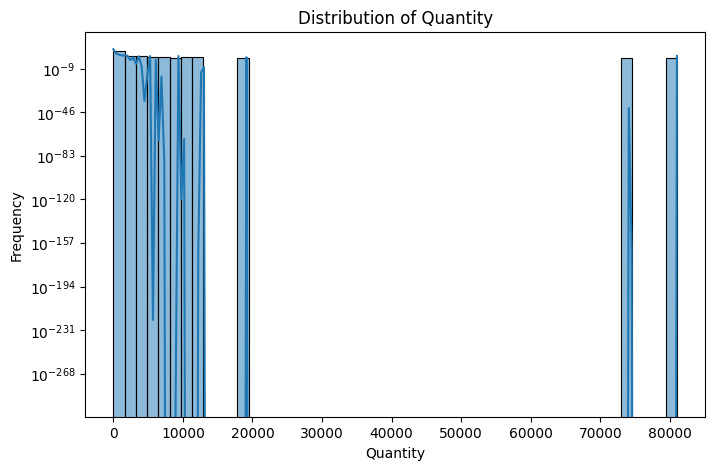

In [68]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df['Quantity'], bins=50, kde=True, ax=ax)
plt.yscale('log')
ax.set_title('Distribution of Quantity')
ax.set_xlabel('Quantity')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Quantity')

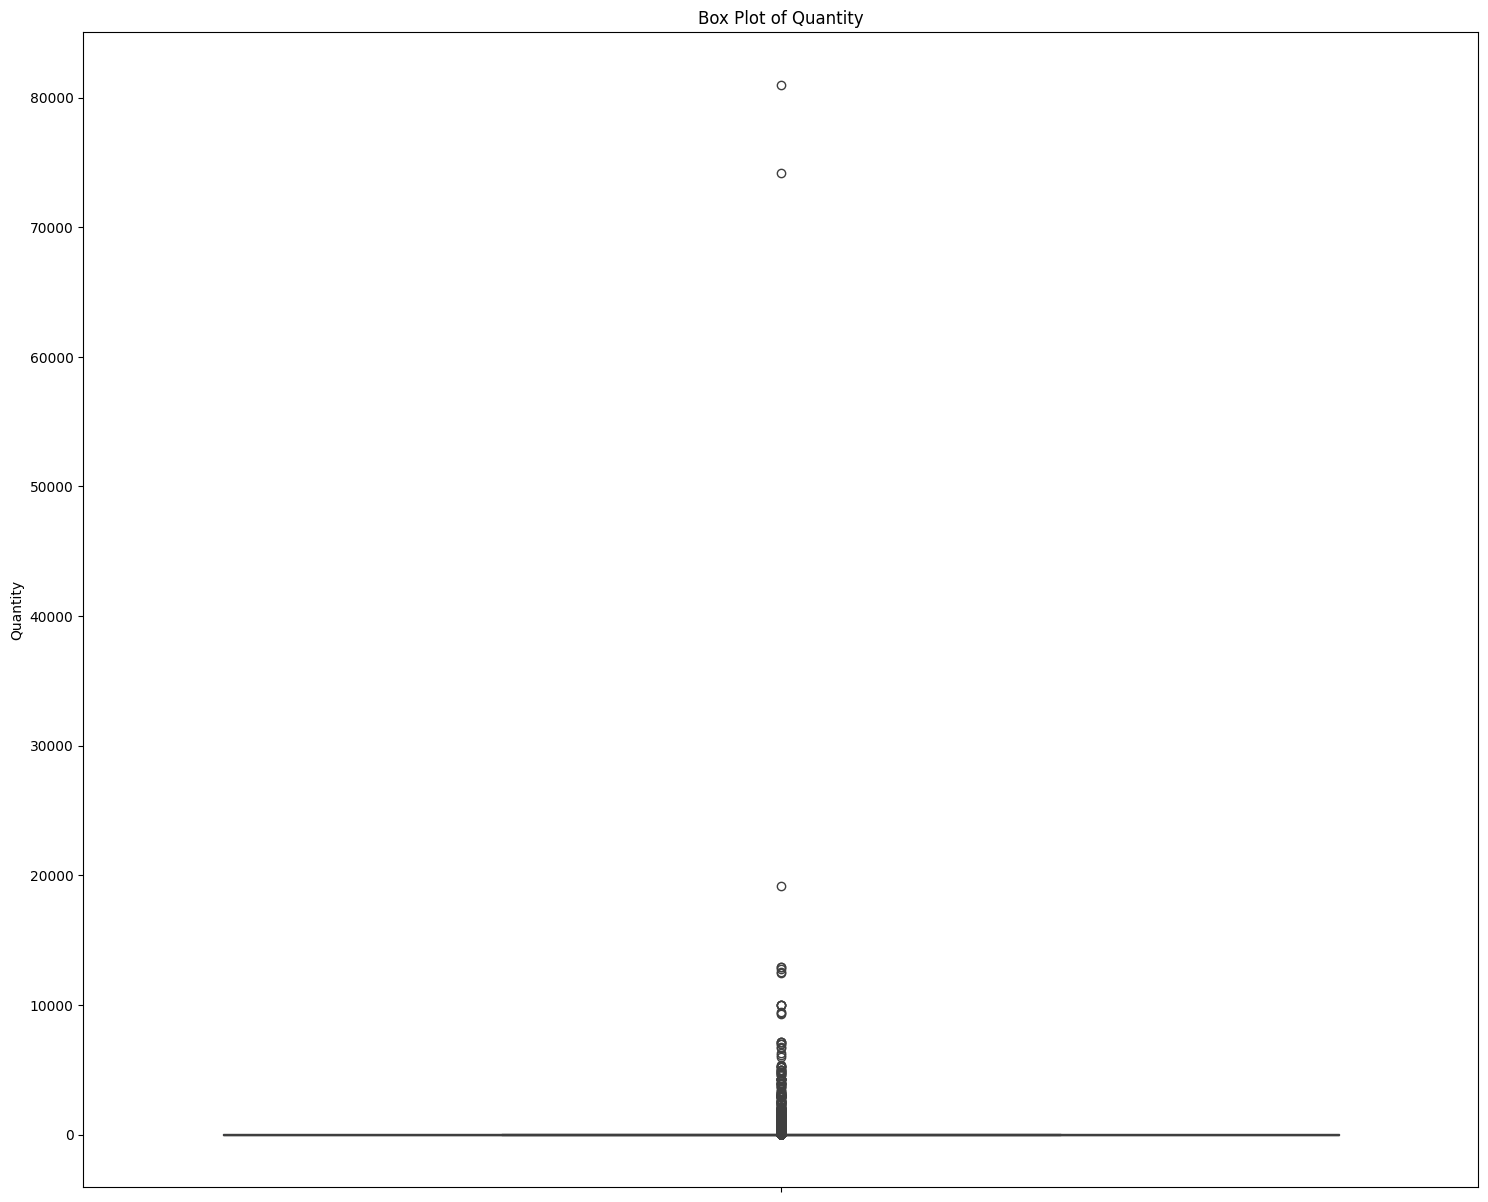

In [69]:
fig, ax = plt.subplots(figsize=(18,15))
sns.boxplot(y=df['Quantity'], ax=ax)
ax.set_title('Box Plot of Quantity')
ax.set_ylabel('Quantity')


In [70]:
df[df['Price'] < 0.0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [71]:
df.sort_values('Price').iloc[-1]

Invoice                                556444
StockCode                               22502
Description    PICNIC BASKET WICKER 60 PIECES
Quantity                                   60
InvoiceDate               2011-06-10 15:28:00
Price                                   649.5
Customer ID                           15098.0
Country                        United Kingdom
Name: 538465, dtype: object

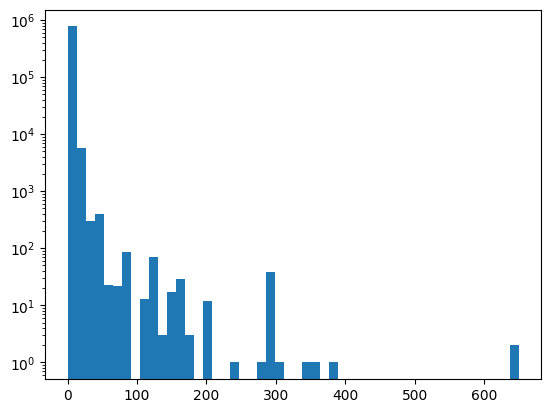

In [72]:
plt.hist(df['Price'], bins=50)
plt.yscale('log')

<Axes: ylabel='Price'>

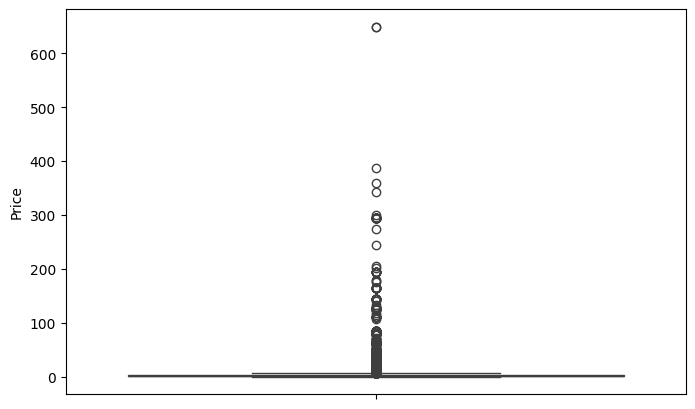

In [73]:
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(y=df['Price'], ax=ax)


## Insights: Data Quality EDA

- **Quantity Distribution**: The quantity distribution shows a highly skewed pattern with extreme outliers
- **Price Distribution**: Price values appear to have a wide range with majorly small


### PRODUCT-LEVEL EDA

In [74]:
df.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
612818,565479,46000S,POLYESTER FILLER PAD 40x40cm,15,2011-09-05 11:19:00,1.45,13999.0,United Kingdom
370657,534669,20983,12 PENCILS TALL TUBE RED RETROSPOT,5,2010-11-23 13:59:00,0.85,12577.0,France
220853,517976,21754,HOME BUILDING BLOCK WORD,1,2010-08-03 14:18:00,5.95,14871.0,United Kingdom
166916,511119,20972,PINK CREAM FELT CRAFT TRINKET BOX,12,2010-06-07 10:49:00,1.25,15366.0,United Kingdom
92389,501730,22479,DAISY GARDEN MARKER,3,2010-03-19 11:05:00,1.25,14159.0,United Kingdom


In [75]:
df['Revenue'] = df['Quantity'] * df['Price']

In [76]:
top_revenue = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
top_revenue

Description
REGENCY CAKESTAND 3 TIER              277656.25
WHITE HANGING HEART T-LIGHT HOLDER    247048.01
PAPER CRAFT , LITTLE BIRDIE           168469.60
JUMBO BAG RED RETROSPOT               134307.44
ASSORTED COLOUR BIRD ORNAMENT         124351.86
PARTY BUNTING                         103283.38
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
PAPER CHAIN KIT 50'S CHRISTMAS         76598.18
CHILLI LIGHTS                          69084.30
JUMBO BAG STRAWBERRY                   64127.77
Name: Revenue, dtype: float64

In [77]:
# Top 10 by Quantity
top_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_quantity

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     105185
WHITE HANGING HEART T-LIGHT HOLDER     91757
PAPER CRAFT , LITTLE BIRDIE            80995
ASSORTED COLOUR BIRD ORNAMENT          78234
MEDIUM CERAMIC TOP STORAGE JAR         77916
JUMBO BAG RED RETROSPOT                74224
BROCADE RING PURSE                     70082
PACK OF 60 PINK PAISLEY CAKE CASES     54592
60 TEATIME FAIRY CAKE CASES            52828
PACK OF 72 RETRO SPOT CAKE CASES       45129
Name: Quantity, dtype: int64

In [78]:
# Bottom 10 (Filtering for items sold at least once)
bottom_sellers = df.groupby('Description')['Quantity'].sum().sort_values(ascending=True).head(10)
bottom_sellers

Description
CERAMIC CAKE TEAPOT WITH CHERRY       1
SPOTTY COCKEREL DOORSTOP              1
PINK STRIPES SHOULDER BAG             1
CANDY STRIPE ROSE QUILT               1
PINK HEART CHRISTMAS DECORATION       1
WHITE SCANDINAVIAN HEART CHRISTMAS    1
OPAL WHITE/SILVER FLOWER NECKLACE     1
CIRCUS PARADE LUNCHBOX                1
NEW BAROQUE WALL MIRROR               1
SWALLOW SMALL TUBE MATCHES            1
Name: Quantity, dtype: int64

In [79]:
def calculate_revenue_concentration(df, percentile=0.10):
    
    product_revenue = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).reset_index()
    
    total_revenue = product_revenue['Revenue'].sum()
    total_products = len(product_revenue)
    
    top_n_count = int(total_products * percentile)
    revenue_from_top_n = product_revenue.iloc[:top_n_count]['Revenue'].sum()
    
    concentration = (revenue_from_top_n / total_revenue) * 100
    
    print(f"Total Unique Products: {total_products}")
    print(f"The Top {percentile*100:.0f}% of products ({top_n_count} items) generate {concentration:.2f}% of total revenue.")

    return product_revenue

product_stats = calculate_revenue_concentration(df, percentile=0.10)

Total Unique Products: 5275
The Top 10% of products (527 items) generate 61.38% of total revenue.


In [80]:
inventory = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)
inventory.head(10)

StockCode
84077     105185
85099B     93436
85123A     91814
21212      89850
23843      80995
84879      78234
23166      77916
22197      76944
17003      70082
21977      54592
Name: Quantity, dtype: int64

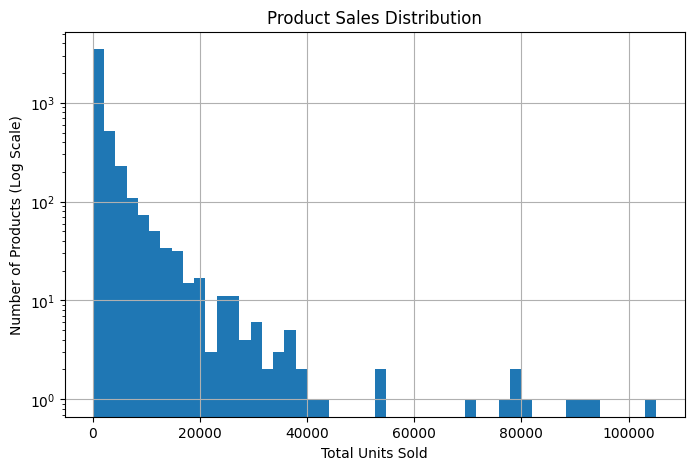

In [81]:
inventory.hist(bins=50, figsize=(8,5))
plt.yscale('log')
plt.title("Product Sales Distribution")
plt.xlabel("Total Units Sold")
plt.ylabel("Number of Products (Log Scale)")
plt.show()

## Insights: Product-Level EDA

- **Revenue Concentration**: The top 10% of products (528 items) generate **61.91% of total revenue**, indicating high product concentration and potential dependency on key SKUs
- **Product Performance**: Significant disparity between top and bottom sellers suggests:
  - Strong winners in the product portfolio
  - Long tail of low-volume products that may need inventory optimization
- **Sales Distribution**: The highly skewed inventory distribution (log-scale histogram) shows most products have low sales volume, with a small number of high-performing products


In [82]:
top_5_percent = int(len(inventory) * 0.05)

high_frequency = inventory.head(top_5_percent)
rare_sellers = inventory.tail(top_5_percent)

print(f"High-Freq Items: {len(high_frequency)}")
print(f"Rare Items: {len(rare_sellers)}")

High-Freq Items: 231
Rare Items: 231


### Time Based EDA

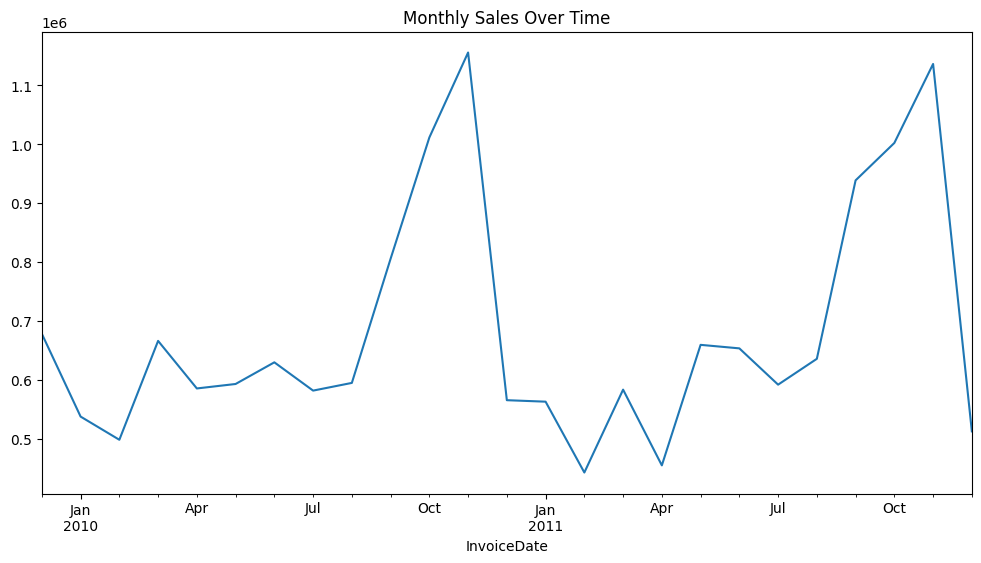

In [84]:
#Sales over time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
sales_over_time = df.set_index('InvoiceDate').resample('ME')['Revenue'].sum()
sales_over_time.plot(figsize=(12,6))
plt.title("Monthly Sales Over Time")
plt.show()

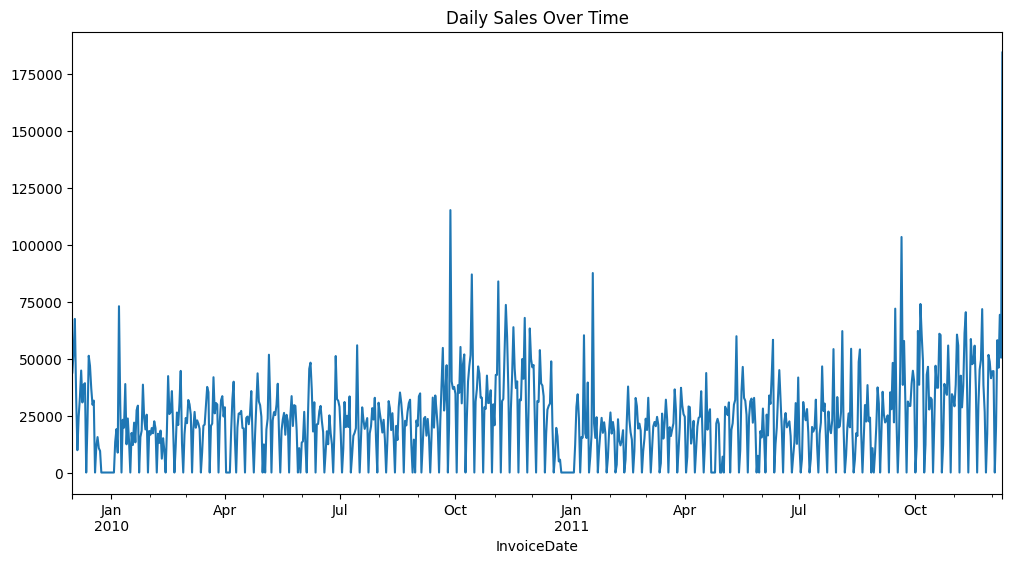

In [ ]:
#Daily sales line plot
daily_sales = df.set_index('InvoiceDate').resample('D')['Revenue'].sum()
daily_sales.plot(figsize=(12,6))
plt.title("Daily Sales Over Time")
plt.show()

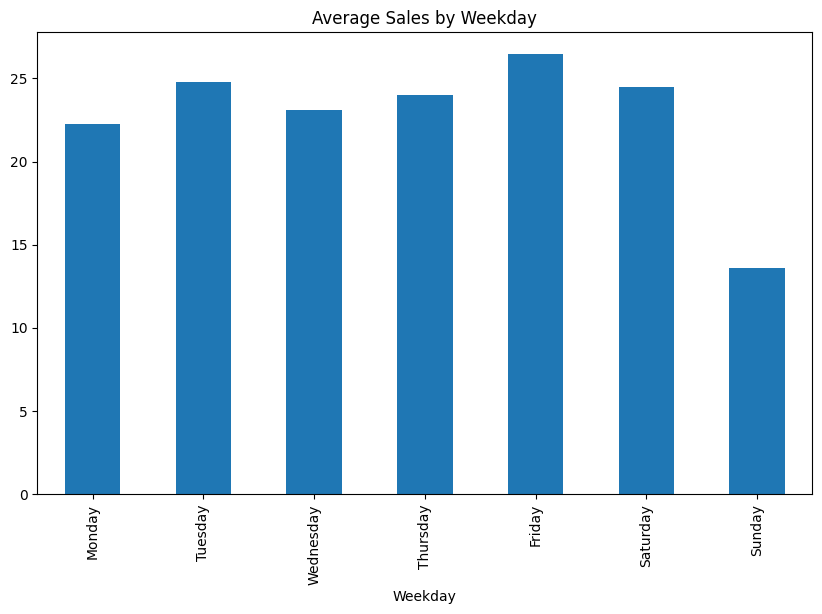

In [ ]:
#Average sales per weekday
df['Weekday'] = df['InvoiceDate'].dt.day_name()
average_sales_weekday = df.groupby('Weekday')['Revenue'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)   
average_sales_weekday.plot(kind='bar', figsize=(10,6))
plt.title("Average Sales by Weekday")   
plt.show()

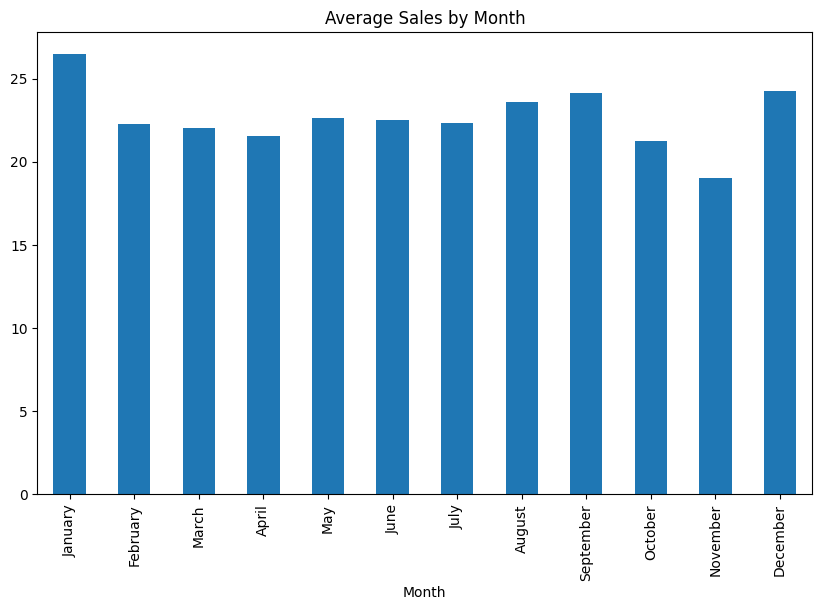

In [ ]:
#Average sales per month
df['Month'] = df['InvoiceDate'].dt.month_name()
average_sales_month = df.groupby('Month')['Revenue'].mean().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)
average_sales_month.plot(kind='bar', figsize=(10,6))
plt.title("Average Sales by Month")
plt.show()

## Insights: Time-Based EDA

- **Weekday Patterns**: Average sales by weekday can help identify peak shopping days with Sunday being the lowest and Wednesday being the highest
- **Monthly Patterns**: Monthly sales variations with January, December being at the top

### CUSTOMER-LEVEL EDA (FOR RFM)

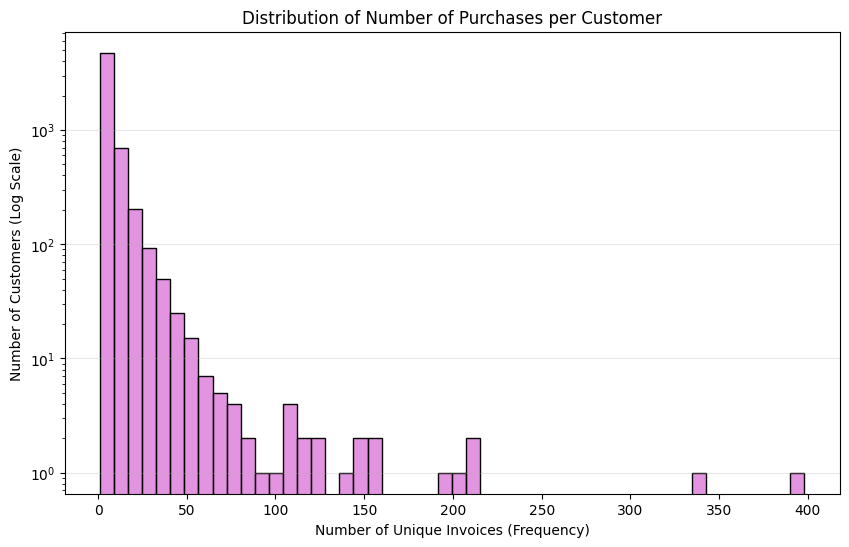

In [ ]:
customer_freq = df.groupby('Customer ID')['Invoice'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(customer_freq, bins=50, kde=False, color='orchid')
plt.yscale('log') 

plt.title('Distribution of Number of Purchases per Customer')
plt.xlabel('Number of Unique Invoices (Frequency)')
plt.ylabel('Number of Customers (Log Scale)')
plt.grid(axis='y', alpha=0.3)

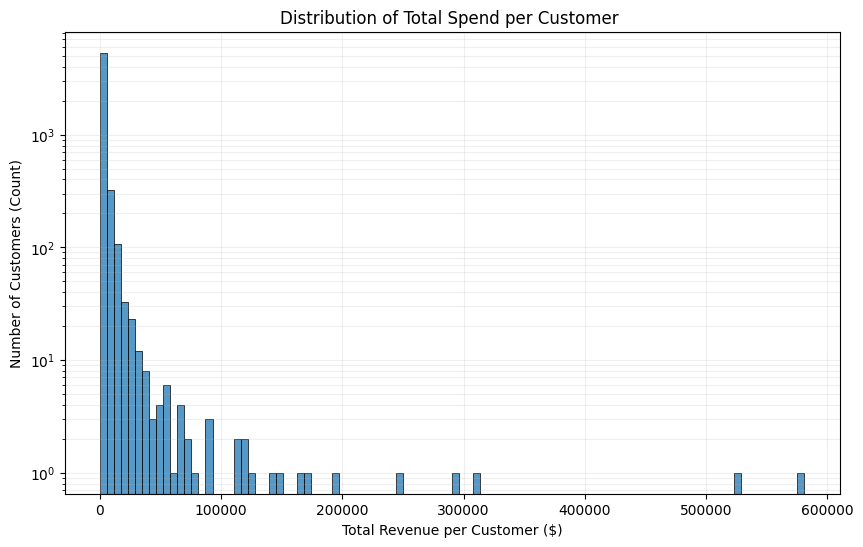

In [ ]:
customer_spend = df.groupby('Customer ID')['Revenue'].sum()
plt.figure(figsize=(10, 6))

sns.histplot(customer_spend, bins=100, kde=False)
plt.yscale('log')
# plt.xscale('log') 

plt.title('Distribution of Total Spend per Customer ')
plt.xlabel('Total Revenue per Customer ($)')
plt.ylabel('Number of Customers (Count)')
plt.grid(True, which="both", ls="-", alpha=0.2)

In [ ]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
reference_date


Timestamp('2011-12-10 12:50:00')

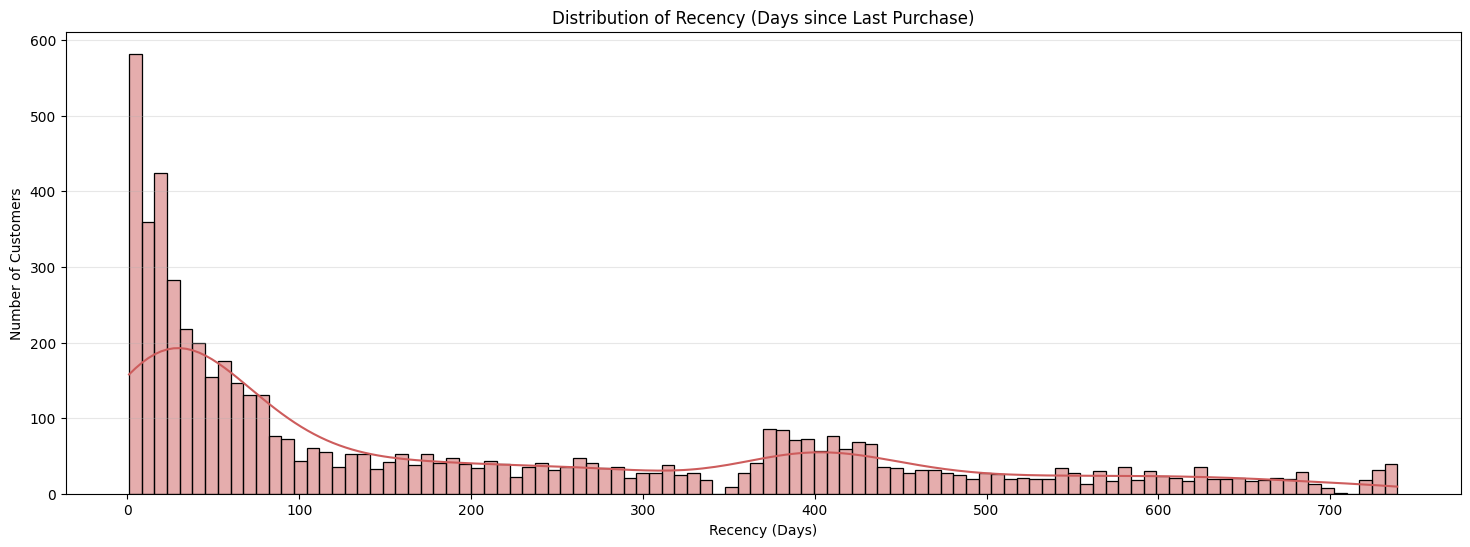

In [ ]:
recency_df = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days
}).rename(columns={'InvoiceDate': 'Recency'})

plt.figure(figsize=(18, 6))
sns.histplot(recency_df['Recency'], bins=100, color='indianred', kde=True)

plt.title('Distribution of Recency (Days since Last Purchase)')
plt.xlabel('Recency (Days)')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.3)

## Insights: Customer-Level EDA (RFM Analysis)

- **Purchase Frequency**: The distribution of purchase frequency per customer shows a highly skewed pattern (log-scale), indicating:
  - Most customers make few purchases (long tail)
  - A small segment of highly engaged customers with frequent purchases
- **Recency Distribution**: The recency distribution shows how recently customers made their last purchase, which is critical for:
  - Identifying at-risk customers who haven't purchased recently
  - Segmenting customers for targeted marketing campaigns

### COUNTRY-LEVEL EDA

In [ ]:
df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

Country
United Kingdom          1.438923e+07
EIRE                    6.165705e+05
Netherlands             5.540381e+05
Germany                 4.250197e+05
France                  3.487690e+05
Australia               1.692835e+05
Spain                   1.083325e+05
Switzerland             1.000619e+05
Sweden                  9.151582e+04
Denmark                 6.858069e+04
Belgium                 6.538782e+04
Norway                  5.632250e+04
Portugal                5.555478e+04
Channel Islands         4.462333e+04
Japan                   4.302391e+04
Italy                   3.210817e+04
Finland                 2.992554e+04
Singapore               2.531706e+04
Cyprus                  2.484995e+04
Austria                 2.361301e+04
Greece                  1.909619e+04
Poland                  1.065429e+04
Israel                  1.041524e+04
United Arab Emirates    9.202690e+03
Unspecified             8.607350e+03
USA                     8.366860e+03
Malta                   8.0990

In [ ]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

# 2. Calculate % Revenue from UK
total_revenue = country_revenue.sum()
uk_revenue = country_revenue.get('United Kingdom', 0)
uk_pct = (uk_revenue / total_revenue) * 100

# 3. Top 5 Countries (Excluding UK for better visualization of the rest)
top_countries_ex_uk = country_revenue.drop('United Kingdom').head(5)

print(f"Total Revenue: {total_revenue:,.2f}")
print(f"UK Revenue: {uk_revenue:,.2f} ({uk_pct:.2f}%)")

Total Revenue: 17,374,804.27
UK Revenue: 14,389,234.92 (82.82%)


## Insights: Country-Level EDA

- **Market Concentration**: **United Kingdom dominates with 82.82% of total revenue** (14.39M out of 17.37M), indicating:
  - Geographic risk concentration in UK market
- **International Presence**: While UK is dominant, the presence of other countries suggests an international customer base with growth opportunities

### CORRELATION & RELATIONSHIPS

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Weekday,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,Tuesday,December
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,Tuesday,December
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,Tuesday,December
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,Tuesday,December
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,Tuesday,December
...,...,...,...,...,...,...,...,...,...,...,...
779420,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,Friday,December
779421,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Friday,December
779422,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Friday,December
779423,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,Friday,December


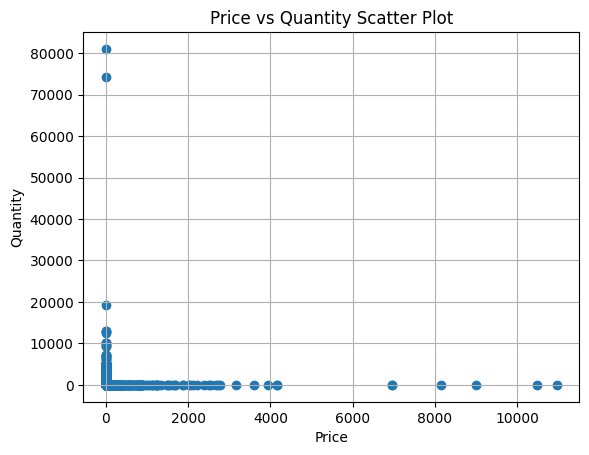

In [ ]:
plt.scatter(df['Price'], df['Quantity'])
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Price vs Quantity Scatter Plot')
plt.grid(True)
plt.show()

## Insights: Correlation & Relationships

- **Price-Quantity Relationship**: The scatter plot of Price vs Quantity helps identify:
  - The scatter plot reveals massive outliers
